In [49]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('howpop_train.csv')

In [51]:

df.shape

(134137, 17)

In [52]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [53]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [55]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://geektimes.ru/post/88856/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [56]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [57]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


In [58]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]
df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]
df['day'] = [d.day for d in df.published]

# 1. В каком месяце (и какого года) было больше всего публикаций?

In [59]:
df.groupby(['month', 'year'])[['post_id']].count().sort_values('post_id', ascending=False).head()
#Ответ: март, 2015

post_id
month year         
3     2015     2189
      2016     2115
7     2015     2111
4     2015     2110
12    2015     2084

# 2. Проанализируйте публикации в месяце из предыдущего вопроса¶
Выберите один или несколько вариантов:

-Один или несколько дней сильно выделяются из общей картины

-На хабре всегда больше статей, чем на гиктаймсе

-По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр hue; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

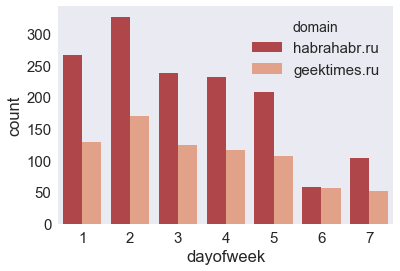

In [60]:
sns.countplot(x='dayofweek', hue='domain', data=df[(df['year'] == 2015) & (df['month'] == 3)]);

In [61]:
#ответ:По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей


# 3. Когда лучше всего публиковать статью?
Больше всего просмотров набирают статьи, опубликованные в 12 часов дня

У опубликованных в 10 утра постов больше всего комментариев

Больше всего просмотров набирают статьи, опубликованные в 6 часов утра

Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера

На хабре дневные статьи комментируют чаще, чем вечерние

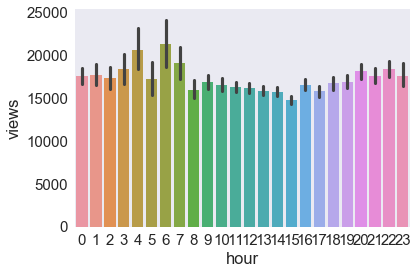

In [62]:
#ОТВЕТ: Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
sns.barplot(x ='hour', y='views', data = df)

In [63]:
df.groupby('hour')[['views']].mean().sort_values('views', ascending=False).head()

,views
hour,
6,21354.310115
4,20678.389091
7,19093.953408
3,18370.017972
22,18365.387460


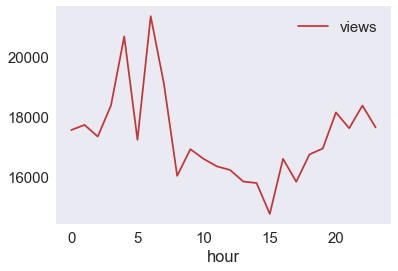

In [64]:
df.groupby('hour')[['views']].mean().plot()

       comments
hour           
4     53.657273
3     53.123877
6     51.799618
1     49.417910
2     48.827025


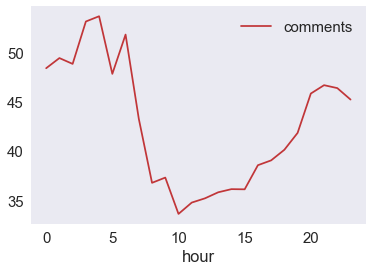

In [65]:
print(df.groupby('hour')[['comments']].mean().sort_values('comments', ascending=False).head())
df.groupby('hour')[['comments']].mean().plot()

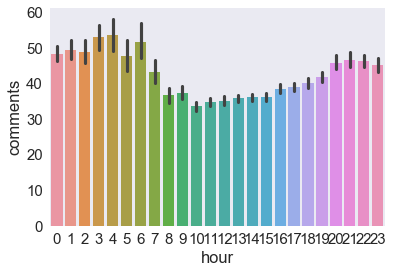

In [66]:
sns.barplot(x ='hour', y='comments', data = df)

In [67]:
df[df.domain == 'geektimes.ru'].sort_values('comments', ascending=False).head(2).T

,38763,65285
url,https://geektimes.ru/post/123157/,https://geektimes.ru/post/171853/
domain,geektimes.ru,geektimes.ru
post_id,123157,171853
published,2011-07-01 02:35:00,2013-03-06 20:07:00
author,@Dottore,@vadimus
flow,NaN,NaN
polling,False,False
content_len,2158,2220
title,Как раздавать инвайты на Google+,Лучшие компьютерные игры всех времен и народов...
comments,2266,1887


 # 4. Кого из топ-20 авторов чаще всего минусуют?
@Mordatyj

@Mithgol - ОТВЕТ

@alizar

@ilya42

In [68]:
top_20 = df.author.value_counts().index[:20]
df[df.author.isin(top_20)].groupby('author')[['votes_minus']].mean().sort_values('votes_minus', ascending=False)

,votes_minus
author,
@Mithgol,20.481081
@XaocCPS,15.286913
@andorro,13.654676
@aleksandrit,9.974643
@Sterhel,9.350785
@alizar,7.928191
@Mordatyj,7.471455
@ilya42,6.216797
@Tylerskald,5.518519


# 5. Сравните субботы и понедельники
Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

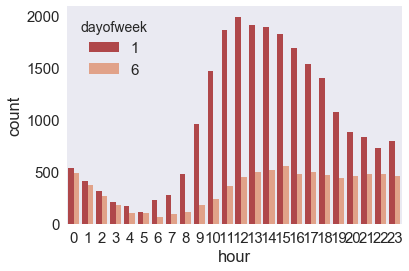

In [69]:
g = sns.countplot(x = 'hour', hue = 'dayofweek', data = df[df.dayofweek.isin([1, 6])])

# ОТВЕТ: НЕТ